In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Analysis

In [4]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("{:.2%} of women survived from the disaster".format(rate_women))
print("{:.2%} of men survived from the disaster".format(rate_men))

74.20% of women survived from the disaster
18.89% of men survived from the disaster


**According to the Train dataset around 74% of women and 19% of men survived from the Titanic disaster**

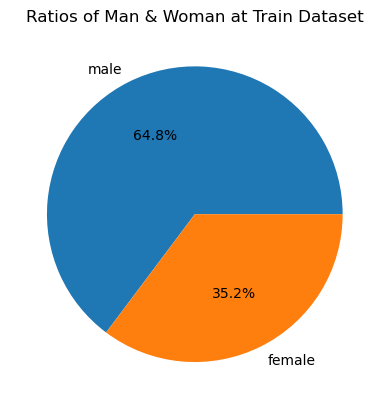

In [5]:
plt.pie(df_train['Sex'].value_counts().values, labels = df_train['Sex'].value_counts().index, autopct='%1.1f%%')
plt.title('Ratios of Man & Woman at Train Dataset')
plt.show()

**As we can see from the pie chart most of the passengers were man**

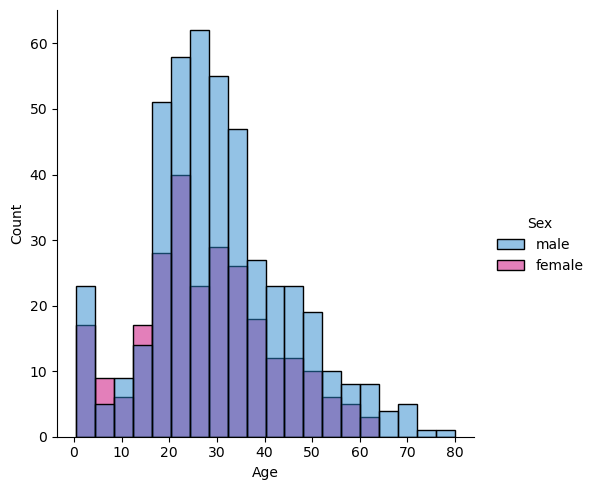

In [6]:
palette = ['#2986cc','#c90076']
sns.displot(data=df_train, x='Age', hue='Sex', palette=palette)
plt.show()

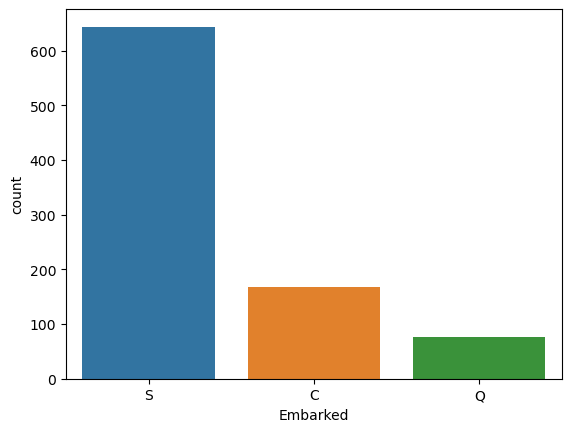

In [7]:
sns.countplot(data=df_train, x='Embarked')
plt.show()

**As we can see from the above bar graph, most of the passengers in the train dataset boarded from the Port of Southampton**

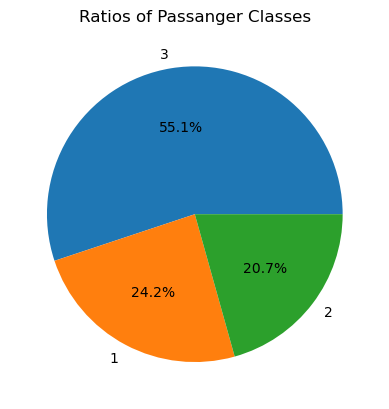

In [8]:
plt.pie(df_train['Pclass'].value_counts().values, labels = df_train['Pclass'].value_counts().index, autopct='%1.1f%%')
plt.title('Ratios of Passanger Classes')
plt.show()

# Model

In [9]:
imp_features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(df_train[imp_features])

X_test = pd.get_dummies(df_test[imp_features])

y_train = df_train['Survived']

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
